In [97]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np

In [12]:
os.getcwd()

'/Users/alexrotondo/Documents/nlp'

In [13]:
filepath = 'data/names.txt'

In [21]:
with open(filepath) as file:
    names = file.readlines()
names = list(map(lambda x: x.split('\\\n')[0], names))

In [22]:
names[2]

'isabella'

In [116]:
def generate_ngrams(names, n=1):
    tokens = {}
    for word in names:
        word = '#' + word + '$'
        for i in range(len(word) - n + 1):
            token = word[i:i+n]
            if token in tokens:
                tokens[token] += 1
            else:
                tokens[token] = 1
    return (tokens.keys(), tokens)

In [117]:
tokens, tokenCounts = generate_ngrams(names)
bigrams, bigramCounts = generate_ngrams(names, n=2)

In [118]:
bigramConditionalProbabilities = {
    
    k:(v/tokenCounts[k[0]]) for k,v in bigramCounts.items()
}

In [119]:
letters = [chr(i + ord('a')) for i in range(26)]
bigramProbabilities = [[0] * 26 for _ in range(26)]
bigramConditionalProbabilities = [[0] * 26 for _ in range(26)]

In [120]:
for i in range(26):
    for j in range(26):
        bigram = chr(i + ord('a')) + chr(j + ord('a'))
        bigramProbabilities[i][j] = bigramCounts.get(bigram, 0) / sum(bigramCounts.values())
        bigramConditionalProbabilities[i][j] = bigramCounts.get(bigram, 0) / tokenCounts.get(bigram[0], 1)

[Text(0, 0, 'a'),
 Text(0, 1, 'b'),
 Text(0, 2, 'c'),
 Text(0, 3, 'd'),
 Text(0, 4, 'e'),
 Text(0, 5, 'f'),
 Text(0, 6, 'g'),
 Text(0, 7, 'h'),
 Text(0, 8, 'i'),
 Text(0, 9, 'j'),
 Text(0, 10, 'k'),
 Text(0, 11, 'l'),
 Text(0, 12, 'm'),
 Text(0, 13, 'n'),
 Text(0, 14, 'o'),
 Text(0, 15, 'p'),
 Text(0, 16, 'q'),
 Text(0, 17, 'r'),
 Text(0, 18, 's'),
 Text(0, 19, 't'),
 Text(0, 20, 'u'),
 Text(0, 21, 'v'),
 Text(0, 22, 'w'),
 Text(0, 23, 'x'),
 Text(0, 24, 'y'),
 Text(0, 25, 'z')]

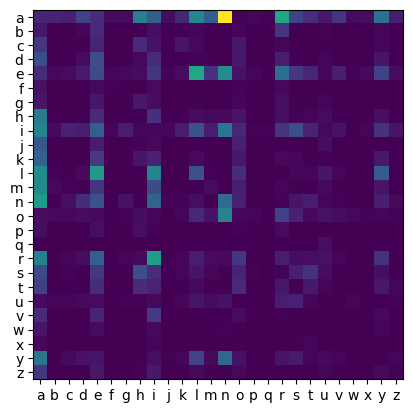

In [121]:
(fig, ax) = plt.subplots()
im = ax.imshow(bigramProbabilities)
ax.set_xticks(np.arange(len(letters)))
ax.set_yticks(np.arange(len(letters)))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)

In [108]:
def generate_name(maxlen, cpMap=bigramConditionalProbabilities):

    nextLetter = random.choice([bigram for bigram in cpMap.keys() if bigram[0] == '#'])
    name = '#' + nextLetter[1]
    
    while name[-1] != '$' and len(name) <= maxlen + 2:
        
        nextOptions = [(bigram[-1], p) for bigram, p in cpMap.items() if bigram[0] == name[-1]]
        nextLetter = random.choices(list(map(lambda x: x[0], nextOptions)),
                                    list(map(lambda x: x[1], nextOptions)))
        name += nextLetter[0]
    
    return name[1:-1]

In [109]:
generate_name(4)

'zaq'

In [114]:
def calculate_perplexity(name, model=bigramConditionalProbabilities):
    
    n = len(name)
    ngrams = (generate_ngrams([name], n=2)).keys()
    
    probability = 1
    
    for ngram in ngrams:
        probability *= (model.get(ngram, 0))
    
    return 0 if probability == 0 else ((probability)**-1)**(1/n)

In [115]:
calculate_perplexity('alex')

23.553532745997643